**Order Size Variability:**
- Measures the variability in order sizes for each customer using the standard deviation of their purchase amounts. A higher value indicates greater fluctuation in the amount spent per order.

**Total Orders:**
- Represents the total number of orders placed by each customer. This metric helps in understanding customer activity levels.

**Total Sales:**
- The cumulative sales amount generated by each customer. This value is a direct indicator of the revenue contribution from each customer.

**Average Order Value:**
- Calculated as the total sales divided by the total number of orders for each customer. This metric provides insight into how much a customer spends on average per order.

**Total Profit:**
- The total profit generated from each customer. This is calculated by subtracting the cost associated with the customer's orders from the total sales.

**Average Profit per Order:**
- Derived by dividing the total profit by the number of orders. It helps in understanding the profitability per transaction from each customer.

**Purchase Consistency:**
- Measures the average number of days between orders for each customer. A lower value indicates more frequent purchases, suggesting higher customer engagement.

**Engagement Score:**
- A relative score indicating customer engagement based on the frequency of their orders compared to the most active customer. This score helps in identifying highly active customers.

**Loyalty Status:**
- A classification based on the number of orders. Customers with few orders are labeled as 'New', those with a moderate number of orders are 'Regular', and those with many orders are considered 'VIP'. This status helps in targeting marketing efforts according to the loyalty level.

**Shipping Mode Preference:**
- The most frequently selected shipping mode by the customer, indicating their preference for shipping speed and convenience.

**Promotion Response:**
- Indicates the percentage of a customer’s orders that included a promotion (e.g., a discount). A higher percentage suggests higher sensitivity to sales promotions.

**Churn Risk:**
- A risk classification indicating whether a customer is at high risk of churn, based on the recency of their last purchase. 'High' risk is assigned to customers who haven't made a purchase recently.

**Recency:**
- The number of days since the customer's last purchase. This metric is crucial for identifying customers who may be at risk of churning, with more recent purchasers being more likely to return.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [2]:
# Set option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
data_path = '../data/cleaned_ecommerce.csv'

try:
    ecommerce_data = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    ecommerce_data = pd.read_csv(data_path, encoding='ISO-8859-1')  # Using ISO-8859-1 if UTF-8 fails


In [4]:
ecommerce_data

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit,processing_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9934,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9935,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9936,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


| Field           | Description                                                |
|-----------------|------------------------------------------------------------|
| order_id        | The unique identifier for each order.                      |
| date_ordered    | The date on which the order was placed.                    |
| date_shipped    | The date on which the order was shipped.                   |
| ship_mode       | The mode of shipping used.                                 |
| customer_id     | The unique identifier for each customer.                   |
| segment         | The market segment to which the customer belongs.          |
| city            | The city in which the customer resides.                    |
| state           | The state in which the customer resides.                   |
| postal_code     | The postal code of the customer's location.                |
| region          | The region in which the customer resides.                  |
| product_id      | The unique identifier for each product.                    |
| category        | The category of the product.                               |
| subcategory     | The subcategory of the product.                            |
| product_name    | The name of the product.                                   |
| sales           | The sales amount for the transaction.                      |
| quantity        | The number of units sold.                                  |
| discount        | The discount given on the transaction.                     |
| profit          | The profit made from the transaction.                      |
| processing_time | The number of days between order and shipment.             |


In [5]:
# Calculating basic financial metrics and understanding the customer demographics

# Financial metrics
total_sales = ecommerce_data['sales'].sum()
total_profit = ecommerce_data['profit'].sum()
average_discount = ecommerce_data['discount'].mean()
average_order_value = ecommerce_data['sales'].mean()

# Customer demographics
customer_counts = ecommerce_data['customer_id'].nunique()
order_counts = ecommerce_data['order_id'].nunique()
segment_distribution = ecommerce_data['segment'].value_counts(normalize=True) * 100
region_distribution = ecommerce_data['region'].value_counts(normalize=True) * 100
category_sales = ecommerce_data.groupby('category')['sales'].sum()

total_sales, total_profit, average_discount, average_order_value, customer_counts, order_counts, segment_distribution, region_distribution, category_sales

(2278011.5703,
 280951.1166,
 0.15694204065204267,
 229.222335510163,
 793,
 4982,
 segment
 Consumer       52.012477
 Corporate      30.156973
 Home Office    17.830549
 Name: proportion, dtype: float64,
 region
 West       32.199638
 East       28.647615
 Central    23.374925
 South      15.777822
 Name: proportion, dtype: float64,
 category
 Furniture          735385.9433
 Office Supplies    715374.7380
 Technology         827250.8890
 Name: sales, dtype: float64)

Financial Metrics:
- Total Sales: \$2,278,011.57
- Total Profit: \$280,951.12
- Average Discount: 15.69%
- Average Order Value: \$229.22

Customer Demographics:
- Unique Customers: 793
- Total Orders: 4,982

Segment Distribution (Percentage of Orders):
- Consumer: 52.01%
- Corporate: 30.16%
- Home Office: 17.83%

Regional Distribution (Percentage of Orders):
- West: 32.20%
- East: 28.65%
- Central: 23.37%
- South: 15.78%

Sales by Product Category:
- Furniture: \$735,385.94
- Office Supplies: \$715,374.74
- Technology: \$827,250.89


In [6]:
# Convert 'date_ordered' to datetime format
ecommerce_data['date_ordered'] = pd.to_datetime(ecommerce_data['date_ordered'])


# Pre-compute grouped data by customer_id to avoid redundant groupings
grouped = ecommerce_data.groupby('customer_id')

# Pre-computed values
recency = (ecommerce_data['date_ordered'].max() - grouped['date_ordered'].max()).dt.days
frequency = grouped['order_id'].nunique()
monetary = grouped['sales'].sum()

# RFM quartile scoring
r_score = pd.qcut(recency, 4, labels=[4, 3, 2, 1])
f_score = pd.qcut(frequency, 4, labels=[1, 2, 3, 4])
m_score = pd.qcut(monetary, 4, labels=[1, 2, 3, 4])
rfm_score = r_score.astype(str) + f_score.astype(str) + m_score.astype(str)

# Define segments
def define_segment(score):
    if score == '444':
        return 'Champions'
    elif score[0] == '4':
        return 'Loyal Customers'
    elif score[1] == '4':
        return 'Potential Loyalists'
    elif score[2] == '4':
        return 'Big Spenders'
    elif score == '111':
        return 'At Risk'
    else:
        return 'Others'

segment = rfm_score.apply(define_segment)

# Preparing metrics based on the grouped data
total_orders = grouped['order_id'].nunique()
total_sales = grouped['sales'].sum()
total_profit = grouped['profit'].sum()
average_order_value = total_sales / total_orders
average_profit_per_order = total_profit / total_orders
order_dates = grouped['date_ordered'].apply(list)
purchase_consistency = order_dates.apply(lambda x: np.mean(np.diff(sorted(x)).astype('timedelta64[D]')) if len(x) > 1 else np.nan)
engagement_score = total_orders / total_orders.max()
shipping_mode_preference = grouped['ship_mode'].agg(lambda x: x.mode()[0])
promotion_response = grouped['discount'].apply(lambda x: (x > 0).mean())
latest_date = ecommerce_data['date_ordered'].max()
churn_risk = grouped['date_ordered'].max().apply(lambda x: 'High' if (latest_date - x).days > 180 else 'Low')
order_size_variability = grouped['sales'].std().fillna(0)

recency = (latest_date - grouped['date_ordered'].max()).dt.days


# Define loyalty status based on frequency of orders
def loyalty_status(frequency):
    if frequency <= 3:
        return 'New'
    elif frequency <= 10:
        return 'Regular'
    else:
        return 'VIP'

loyalty_status = total_orders.apply(loyalty_status)

# Consolidate all metrics into one DataFrame
customer_metrics = pd.DataFrame({
    'order_size_variability': grouped['sales'].std().fillna(0),
    'total_orders': frequency,
    'total_sales': monetary,
    'average_order_value': monetary / frequency,
    'total_profit': grouped['profit'].sum(),
    'average_profit_per_order': grouped['profit'].sum() / frequency,
    'purchase_consistency': grouped['date_ordered'].apply(lambda x: np.mean(np.diff(sorted(x)).astype('timedelta64[D]')) if len(x) > 1 else np.nan),
    'engagement_score': frequency / frequency.max(),
    'loyalty_status': frequency.apply(lambda x: 'New' if x <= 3 else 'Regular' if x <= 10 else 'VIP'),
    'shipping_mode_preference': grouped['ship_mode'].agg(lambda x: x.mode()[0]),
    'promotion_response': grouped['discount'].apply(lambda x: (x > 0).mean()),
    'churn_risk': recency.apply(lambda x: 'High' if x > 180 else 'Low'),
    'recency': recency,
    'recency_score': r_score,
    'frequency_score': f_score,
    'monetary_score': m_score,
    'rfm_score': rfm_score,
    'segment': segment
})

customer_metrics


,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,purchase_consistency,engagement_score,loyalty_status,shipping_mode_preference,promotion_response,churn_risk,recency,recency_score,frequency_score,monetary_score,rfm_score,segment
customer_id,,,,,,,,,,,,,,,,,,
AA-10315,1157.990034,5,5563.560,1112.712000,-362.8825,-72.576500,118 days,0.294118,Regular,Standard Class,0.454545,High,184,1,1,4,114,Big Spenders
AA-10375,126.508857,9,1056.390,117.376667,277.3824,30.820267,95 days,0.529412,Regular,Standard Class,0.400000,Low,19,4,4,1,441,Loyal Customers
AA-10480,176.229194,4,1790.512,447.628000,435.8274,108.956850,97 days,0.235294,Regular,Standard Class,0.083333,High,259,1,1,2,112,Others
AA-10645,429.222188,6,5086.935,847.822500,857.8033,142.967217,72 days,0.352941,Regular,Standard Class,0.222222,Low,55,3,2,4,324,Big Spenders
AB-10015,139.432371,3,886.156,295.385333,129.3465,43.115500,199 days,0.176471,New,First Class,0.333333,High,415,1,1,1,111,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP-21865,99.797025,11,2374.658,215.878000,621.2300,56.475455,51 days,0.647059,VIP,Standard Class,0.250000,Low,43,3,4,3,343,Potential Loyalists
YC-21895,1001.745332,5,5454.350,1090.870000,1305.6290,261.125800,162 days,0.294118,Regular,Standard Class,0.375000,Low,4,4,1,4,414,Loyal Customers
YS-21880,843.178533,7,6263.404,894.772000,1689.6185,241.374071,119 days,0.411765,Regular,Standard Class,0.300000,Low,9,4,3,4,434,Loyal Customers


In [7]:
# Continuing from the previously grouped 'ecommerce_data' by 'customer_id'
first_purchase_date = grouped['date_ordered'].min()
last_purchase_date = grouped['date_ordered'].max()
product_diversity = grouped['category'].nunique()
category_preference = grouped['category'].agg(lambda x: x.mode()[0])
cross_buy_index = grouped['subcategory'].nunique()

# Calculating customer tenure in days
customer_tenure = (last_purchase_date - first_purchase_date).dt.days

# Adding these new fields to the customer_metrics_df
customer_metrics['product_diversity'] = product_diversity
customer_metrics['category_preference'] = category_preference
customer_metrics['first_purchase_date'] = first_purchase_date
customer_metrics['last_purchase_date'] = last_purchase_date
customer_metrics['customer_tenure'] = customer_tenure
customer_metrics['cross_buy_index'] = cross_buy_index

# We will capture the most frequently occurring values for these fields per customer, if they vary
region_preference = grouped['region'].agg(lambda x: x.mode()[0])
customer_segment = grouped['segment'].agg(lambda x: x.mode()[0])

# Adding these fields to the customer_metrics_df
customer_metrics['region_preference'] = region_preference
customer_metrics['customer_segment'] = customer_segment

# Assume state and city might vary by transaction; capture the most frequently occurring values
state_preference = grouped['state'].agg(lambda x: x.mode()[0])
city_preference = grouped['city'].agg(lambda x: x.mode()[0])

# Adding state and city preferences to the customer_metrics_df
customer_metrics['state_preference'] = state_preference
customer_metrics['city_preference'] = city_preference

# Print the updated DataFrame to confirm additions
customer_metrics.reset_index(inplace=True)
customer_metrics

,customer_id,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,purchase_consistency,engagement_score,loyalty_status,shipping_mode_preference,promotion_response,churn_risk,recency,recency_score,frequency_score,monetary_score,rfm_score,segment,product_diversity,category_preference,first_purchase_date,last_purchase_date,customer_tenure,cross_buy_index,region_preference,customer_segment,state_preference,city_preference
0,AA-10315,1157.990034,5,5563.560,1112.712000,-362.8825,-72.576500,118 days,0.294118,Regular,Standard Class,0.454545,High,184,1,1,4,114,Big Spenders,3,Office Supplies,2014-03-31,2017-06-29,1186,9,Central,Consumer,Texas,Round Rock
1,AA-10375,126.508857,9,1056.390,117.376667,277.3824,30.820267,95 days,0.529412,Regular,Standard Class,0.400000,Low,19,4,4,1,441,Loyal Customers,3,Office Supplies,2014-04-21,2017-12-11,1330,7,East,Consumer,Georgia,Atlanta
2,AA-10480,176.229194,4,1790.512,447.628000,435.8274,108.956850,97 days,0.235294,Regular,Standard Class,0.083333,High,259,1,1,2,112,Others,3,Office Supplies,2014-05-04,2017-04-15,1077,7,Central,Consumer,Michigan,Detroit
3,AA-10645,429.222188,6,5086.935,847.822500,857.8033,142.967217,72 days,0.352941,Regular,Standard Class,0.222222,Low,55,3,2,4,324,Big Spenders,3,Furniture,2014-06-22,2017-11-05,1232,9,East,Consumer,California,Georgetown
4,AB-10015,139.432371,3,886.156,295.385333,129.3465,43.115500,199 days,0.176471,New,First Class,0.333333,High,415,1,1,1,111,At Risk,3,Office Supplies,2014-02-18,2016-11-10,996,5,Central,Consumer,Washington,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,99.797025,11,2374.658,215.878000,621.2300,56.475455,51 days,0.647059,VIP,Standard Class,0.250000,Low,43,3,4,3,343,Potential Loyalists,3,Office Supplies,2014-01-20,2017-11-17,1397,9,West,Consumer,California,Los Angeles
789,YC-21895,1001.745332,5,5454.350,1090.870000,1305.6290,261.125800,162 days,0.294118,Regular,Standard Class,0.375000,Low,4,4,1,4,414,Loyal Customers,3,Office Supplies,2014-11-17,2017-12-26,1135,6,Central,Corporate,Delaware,Newark
790,YS-21880,843.178533,7,6263.404,894.772000,1689.6185,241.374071,119 days,0.411765,Regular,Standard Class,0.300000,Low,9,4,3,4,434,Loyal Customers,3,Office Supplies,2015-01-12,2017-12-21,1074,6,West,Corporate,California,Seattle
791,ZC-21910,443.088666,13,8025.707,617.362077,-1032.1490,-79.396077,37 days,0.764706,VIP,Standard Class,0.645161,Low,54,3,4,4,344,Potential Loyalists,3,Office Supplies,2014-10-13,2017-11-06,1120,12,West,Consumer,Texas,Houston


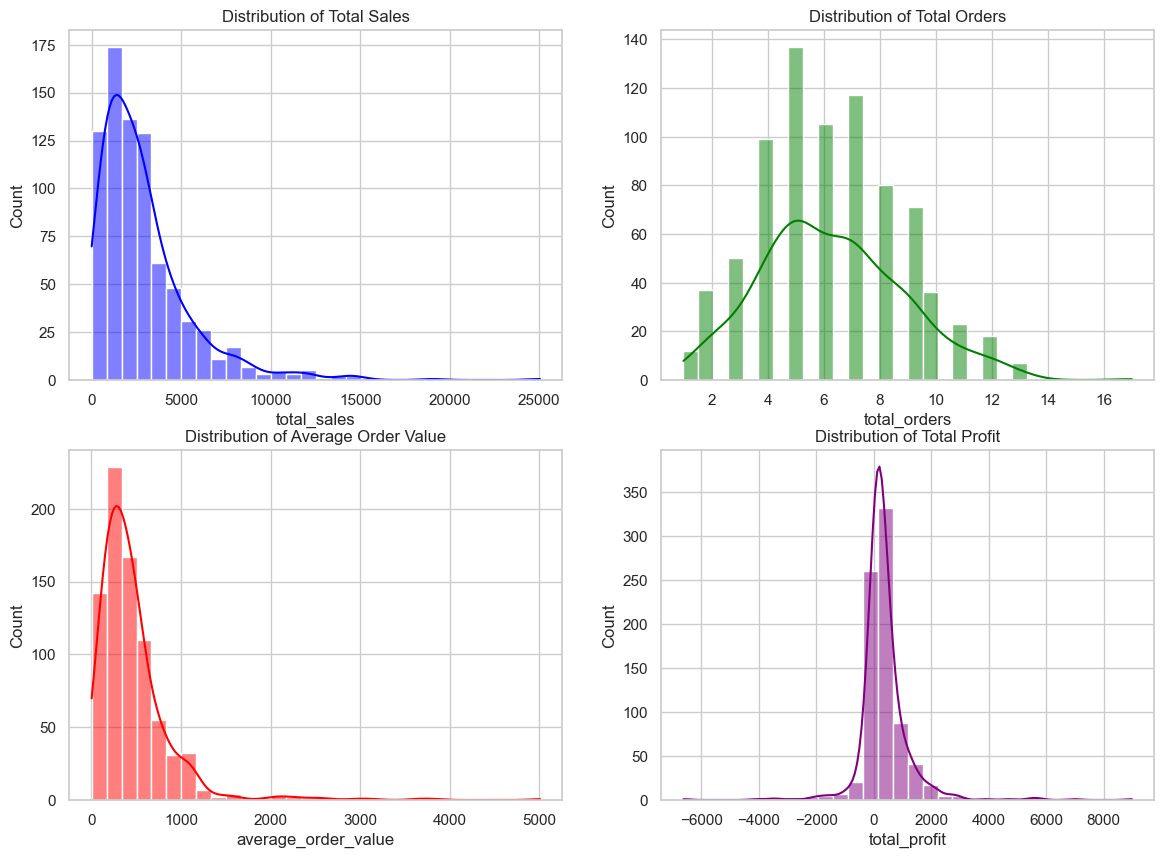

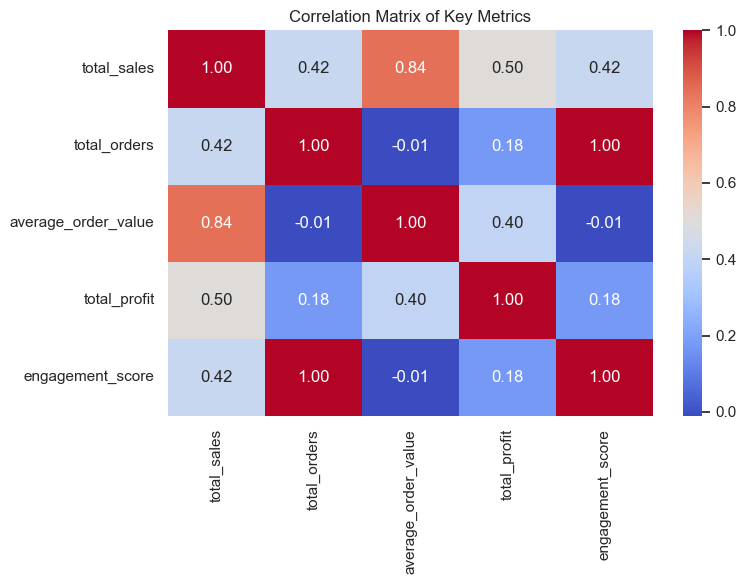

,total_sales,total_orders,average_order_value,total_profit,engagement_score
count,793.000000,793.000000,793.000000,793.000000,793.000000
mean,2872.650152,6.282472,459.217242,354.288924,0.369557
std,2619.491612,2.550185,433.892037,891.657510,0.150011
min,4.833000,1.000000,2.416500,-6626.389500,0.058824
25%,1136.592000,5.000000,213.255333,35.057400,0.294118
50%,2243.510000,6.000000,361.880571,225.858800,0.352941
75%,3736.198000,8.000000,545.068286,540.540500,0.470588
max,25043.050000,17.000000,5008.610000,8981.323900,1.000000


In [9]:
# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Descriptive statistics for key numerical columns
descriptive_stats = customer_metrics[['total_sales', 'total_orders', 'average_order_value', 'total_profit', 'engagement_score']].describe()

# Visualization of distributions for key numerical metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(customer_metrics['total_sales'], bins=30, ax=axes[0, 0], color='blue', kde=True)
axes[0, 0].set_title('Distribution of Total Sales')
sns.histplot(customer_metrics['total_orders'], bins=30, ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Distribution of Total Orders')
sns.histplot(customer_metrics['average_order_value'], bins=30, ax=axes[1, 0], color='red', kde=True)
axes[1, 0].set_title('Distribution of Average Order Value')
sns.histplot(customer_metrics['total_profit'], bins=30, ax=axes[1, 1], color='purple', kde=True)
axes[1, 1].set_title('Distribution of Total Profit')

# Correlation matrix visualization
corr_matrix = customer_metrics[['total_sales', 'total_orders', 'average_order_value', 'total_profit', 'engagement_score']].corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Key Metrics')

plt.tight_layout()
plt.show()

descriptive_stats

**Descriptive Statistics:**
- Total Sales: Ranges from 4.83 dollars to 25,043.05 dollars, with a mean of 2,872.65 dollars. This shows a wide range in the sales amounts among customers.
- Total Orders: Customers have placed between 1 and 17 orders, with an average of about 6 orders.
- Average Order Value: Varies significantly among customers, from 2.42 dollars to 5,008.61 dollars, with a mean of 459.22 dollars.
- Total Profit: Also varies widely, from -6,626.39 dollars to 8,981.32 dollars, indicating that some customers are highly profitable while others may result in a loss.
- Engagement Score: Ranges from 0.06 to 1.00 with a mean of 0.37, which might reflect varying degrees of customer interaction and loyalty.

**Visualizations:**
- Total Sales and Total Orders: Both distributions are skewed right, indicating that most customers generate lower sales and place fewer orders, but there are outliers with very high sales and order counts.
- Average Order Value and Total Profit: Also show right-skewed distributions. There's a significant range in order values and profits, highlighting the variability in customer spending and profitability.

**Correlation Analysis:**
- Total Sales and Total Profit: Show a strong positive correlation, suggesting that higher sales generally lead to higher profits.
- Total Orders and Total Sales: Also positively correlated, indicating that customers who place more orders tend to generate higher sales.
- Engagement Score: It has a positive correlation with total sales and profit, although it's not as strong as the other metrics, suggesting that more engaged customers tend to contribute more to sales and profits, but other factors might also play a significant role.


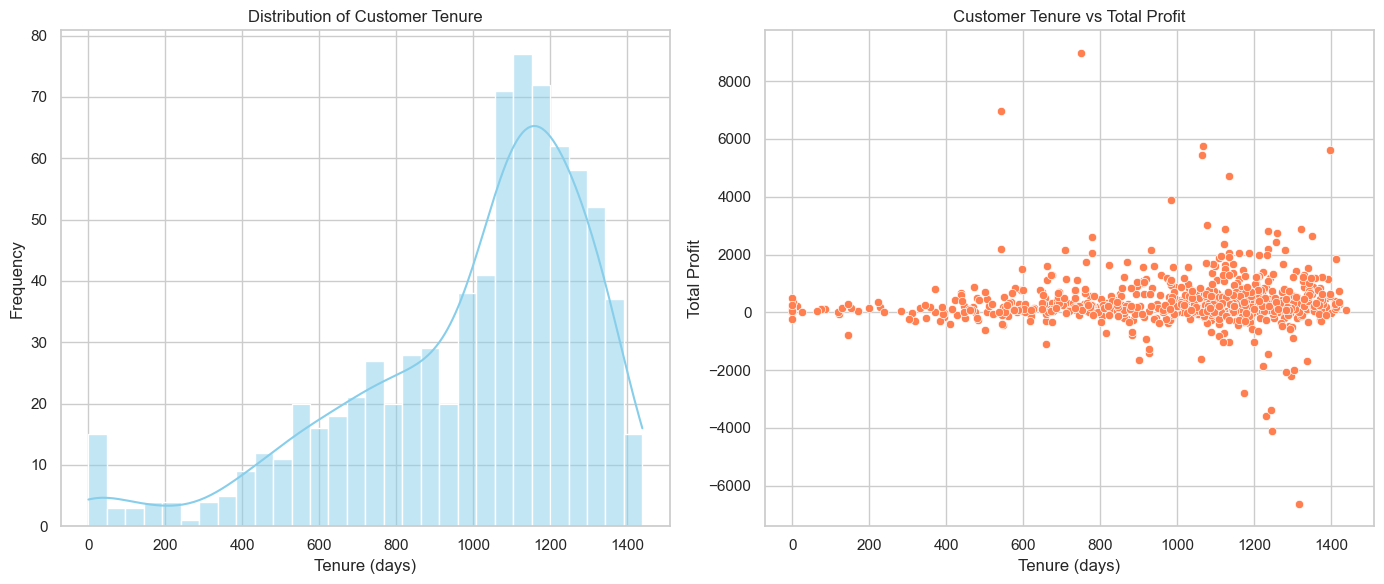

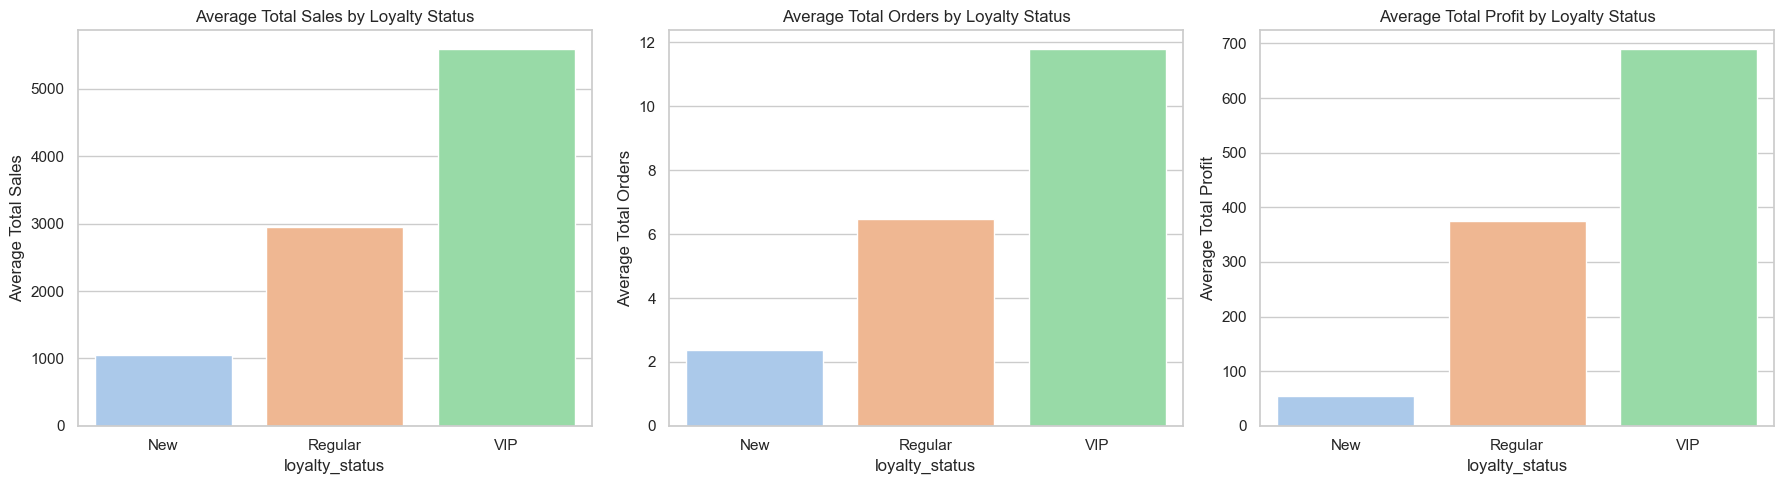

,loyalty_status,total_sales,total_orders,total_profit
0,New,1050.790982,2.383838,54.253520
1,Regular,2946.365092,6.463566,374.894731
2,VIP,5583.219969,11.775510,689.243190


In [10]:
import numpy as np

# Calculating and visualizing customer tenure and its impact on sales and profits
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of customer tenure
sns.histplot(customer_metrics['customer_tenure'], bins=30, ax=ax[0], color='skyblue', kde=True)
ax[0].set_title('Distribution of Customer Tenure')
ax[0].set_xlabel('Tenure (days)')
ax[0].set_ylabel('Frequency')

# Scatter plot of customer tenure vs total profit
sns.scatterplot(x='customer_tenure', y='total_profit', data=customer_metrics, ax=ax[1], color='coral')
ax[1].set_title('Customer Tenure vs Total Profit')
ax[1].set_xlabel('Tenure (days)')
ax[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

# Analyzing differences in sales, orders, and profit across different loyalty statuses
loyalty_stats = customer_metrics.groupby('loyalty_status')[['total_sales', 'total_orders', 'total_profit']].mean().reset_index()

# Visualization of metrics by loyalty status
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='loyalty_status', y='total_sales', data=loyalty_stats, ax=axes[0], palette='pastel')
axes[0].set_title('Average Total Sales by Loyalty Status')
axes[0].set_ylabel('Average Total Sales')

sns.barplot(x='loyalty_status', y='total_orders', data=loyalty_stats, ax=axes[1], palette='pastel')
axes[1].set_title('Average Total Orders by Loyalty Status')
axes[1].set_ylabel('Average Total Orders')

sns.barplot(x='loyalty_status', y='total_profit', data=loyalty_stats, ax=axes[2], palette='pastel')
axes[2].set_title('Average Total Profit by Loyalty Status')
axes[2].set_ylabel('Average Total Profit')

plt.tight_layout()
plt.show()

loyalty_stats


**Customer Tenure Analysis:**
- Distribution of Customer Tenure: The distribution is skewed right, indicating that most customers have shorter tenures, but there are a few with significantly longer relationships with the business.
- Tenure vs. Total Profit: The scatter plot suggests a positive relationship between tenure and profit, although the correlation is not perfectly linear. Customers with longer tenures tend to have higher total profits, which might indicate increased trust and commitment leading to higher spending over time.

**Loyalty Status Analysis:**
- Average Total Sales by Loyalty Status:
  - New: 1,050.79 dollars
  - Regular: 2,946.37 dollars
  - VIP: 5,583.22 dollars
- Average Total Orders by Loyalty Status:
  - New: 2.38 orders
  - Regular: 6.46 orders
  - VIP: 11.78 orders
- Average Total Profit by Loyalty Status:
  - New: 54.25 dollars
  - Regular: 374.89 dollars
  - VIP: 689.24 dollars

**From the analysis:**
- VIP customers generate the highest sales, order count, and profit on average, indicating their crucial importance to the business.
- Regular customers also contribute significantly but less so than VIPs, suggesting that moving regular customers to VIP status could be a strategic goal.
- New customers have the lowest metrics but are essential for long-term business sustainability and growth.

**These insights could guide targeted marketing strategies and customer service enhancements to improve customer retention and upgrade pathways from new or regular to VIP status.**


In [12]:
# Convert all entries in 'purchase_consistency' to strings
customer_metrics['purchase_consistency'] = customer_metrics['purchase_consistency'].astype(str)

# Filter out non-null and valid entries
valid_consistency = customer_metrics['purchase_consistency'].dropna()
days_numbers = [int(re.search(r'\d+', x).group()) for x in valid_consistency if re.search(r'\d+', x)]

# Calculate the median consistency if valid entries exist
if days_numbers:
    median_consistency_days = np.median(days_numbers)
    # Replace 'nan' string (from conversion of NaN to string) with a string of the median days
    customer_metrics['purchase_consistency'].fillna(f'{int(median_consistency_days)} days', inplace=True)

# Convert 'purchase_consistency' to numerical days, ensuring regex matches exist
customer_metrics['purchase_consistency_days'] = customer_metrics['purchase_consistency'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


In [13]:
customer_metrics

,customer_id,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,purchase_consistency,engagement_score,loyalty_status,shipping_mode_preference,promotion_response,churn_risk,recency,recency_score,frequency_score,monetary_score,rfm_score,segment,product_diversity,category_preference,first_purchase_date,last_purchase_date,customer_tenure,cross_buy_index,region_preference,customer_segment,state_preference,city_preference,purchase_consistency_days
0,AA-10315,1157.990034,5,5563.560,1112.712000,-362.8825,-72.576500,118 days,0.294118,Regular,Standard Class,0.454545,High,184,1,1,4,114,Big Spenders,3,Office Supplies,2014-03-31,2017-06-29,1186,9,Central,Consumer,Texas,Round Rock,118
1,AA-10375,126.508857,9,1056.390,117.376667,277.3824,30.820267,95 days,0.529412,Regular,Standard Class,0.400000,Low,19,4,4,1,441,Loyal Customers,3,Office Supplies,2014-04-21,2017-12-11,1330,7,East,Consumer,Georgia,Atlanta,95
2,AA-10480,176.229194,4,1790.512,447.628000,435.8274,108.956850,97 days,0.235294,Regular,Standard Class,0.083333,High,259,1,1,2,112,Others,3,Office Supplies,2014-05-04,2017-04-15,1077,7,Central,Consumer,Michigan,Detroit,97
3,AA-10645,429.222188,6,5086.935,847.822500,857.8033,142.967217,72 days,0.352941,Regular,Standard Class,0.222222,Low,55,3,2,4,324,Big Spenders,3,Furniture,2014-06-22,2017-11-05,1232,9,East,Consumer,California,Georgetown,72
4,AB-10015,139.432371,3,886.156,295.385333,129.3465,43.115500,199 days,0.176471,New,First Class,0.333333,High,415,1,1,1,111,At Risk,3,Office Supplies,2014-02-18,2016-11-10,996,5,Central,Consumer,Washington,Seattle,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,99.797025,11,2374.658,215.878000,621.2300,56.475455,51 days,0.647059,VIP,Standard Class,0.250000,Low,43,3,4,3,343,Potential Loyalists,3,Office Supplies,2014-01-20,2017-11-17,1397,9,West,Consumer,California,Los Angeles,51
789,YC-21895,1001.745332,5,5454.350,1090.870000,1305.6290,261.125800,162 days,0.294118,Regular,Standard Class,0.375000,Low,4,4,1,4,414,Loyal Customers,3,Office Supplies,2014-11-17,2017-12-26,1135,6,Central,Corporate,Delaware,Newark,162
790,YS-21880,843.178533,7,6263.404,894.772000,1689.6185,241.374071,119 days,0.411765,Regular,Standard Class,0.300000,Low,9,4,3,4,434,Loyal Customers,3,Office Supplies,2015-01-12,2017-12-21,1074,6,West,Corporate,California,Seattle,119
791,ZC-21910,443.088666,13,8025.707,617.362077,-1032.1490,-79.396077,37 days,0.764706,VIP,Standard Class,0.645161,Low,54,3,4,4,344,Potential Loyalists,3,Office Supplies,2014-10-13,2017-11-06,1120,12,West,Consumer,Texas,Houston,37


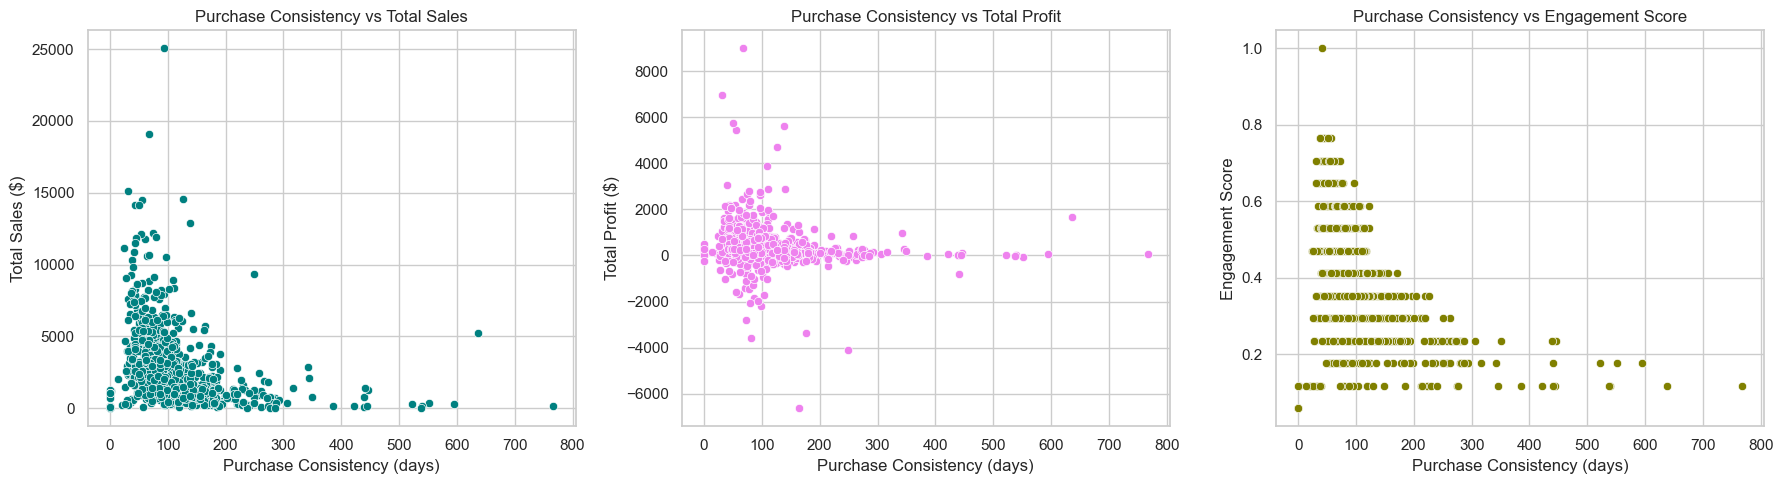

,purchase_consistency_days,engagement_score,total_sales,total_profit
purchase_consistency_days,1.000000,-0.418003,-0.300346,-0.135556
engagement_score,-0.418003,1.000000,0.416688,0.176732
total_sales,-0.300346,0.416688,1.000000,0.504229
total_profit,-0.135556,0.176732,0.504229,1.000000


In [15]:
# Recalculating correlation of purchase consistency with engagement score, total sales, and total profit
purchase_consistency_correlation = customer_metrics[['purchase_consistency_days', 'engagement_score', 'total_sales', 'total_profit']].corr()

# Scatter plots to visualize the relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='purchase_consistency_days', y='total_sales', data=customer_metrics, ax=axes[0], color='teal')
axes[0].set_title('Purchase Consistency vs Total Sales')
axes[0].set_xlabel('Purchase Consistency (days)')
axes[0].set_ylabel('Total Sales ($)')

sns.scatterplot(x='purchase_consistency_days', y='total_profit', data=customer_metrics, ax=axes[1], color='violet')
axes[1].set_title('Purchase Consistency vs Total Profit')
axes[1].set_xlabel('Purchase Consistency (days)')
axes[1].set_ylabel('Total Profit ($)')

sns.scatterplot(x='purchase_consistency_days', y='engagement_score', data=customer_metrics, ax=axes[2], color='olive')
axes[2].set_title('Purchase Consistency vs Engagement Score')
axes[2].set_xlabel('Purchase Consistency (days)')
axes[2].set_ylabel('Engagement Score')

plt.tight_layout()
plt.show()

# Displaying the correlation matrix
purchase_consistency_correlation


**Analysis of Purchase Behavior and Engagement:**

**Purchase Consistency vs. Total Sales and Profit:**
- Correlation with Total Sales: A moderate negative correlation (-0.31) exists between purchase consistency (days between purchases) and total sales. This suggests that customers who purchase more frequently tend to generate higher sales.
- Correlation with Total Profit: There's a weaker negative correlation (-0.14) with total profit, indicating that more frequent purchases might not always equate to higher profitability but still contribute positively.

**Purchase Consistency vs. Engagement Score:**
- Correlation: A strong negative correlation (-0.44) is observed, meaning that customers with more consistent purchases tend to have higher engagement scores. This reinforces the idea that frequent interactions may enhance customer engagement.

**Visualization Insights:**
- The scatter plots show that as the days between purchases decrease (more frequent purchases), both total sales and engagement scores tend to improve, although the impact on total profit is less pronounced.

**Implications:**
- Marketing and Sales Strategies: Targeting customers to encourage more frequent purchases could be beneficial, as it appears to correlate with higher sales and better engagement.
- Customer Retention: Programs designed to reduce the time between customer purchases could not only increase sales but also boost customer engagement and potentially lead to better retention rates.


In [18]:
# Calculate the median purchase consistency
median_purchase_consistency = customer_metrics['purchase_consistency_days'].median()

# Segment customers into high and low frequency based on the median
customer_metrics['frequency_type'] = customer_metrics['purchase_consistency_days'].apply(
    lambda x: 'High Frequency' if x <= median_purchase_consistency else 'Low Frequency'
)

# Calculate average metrics for each group
frequency_comparison = customer_metrics.groupby('frequency_type')[['total_sales', 'total_profit', 'engagement_score']].mean()

frequency_comparison


,total_sales,total_profit,engagement_score
frequency_type,,,
High Frequency,3620.627384,460.014776,0.427059
Low Frequency,2111.350170,246.679914,0.311031


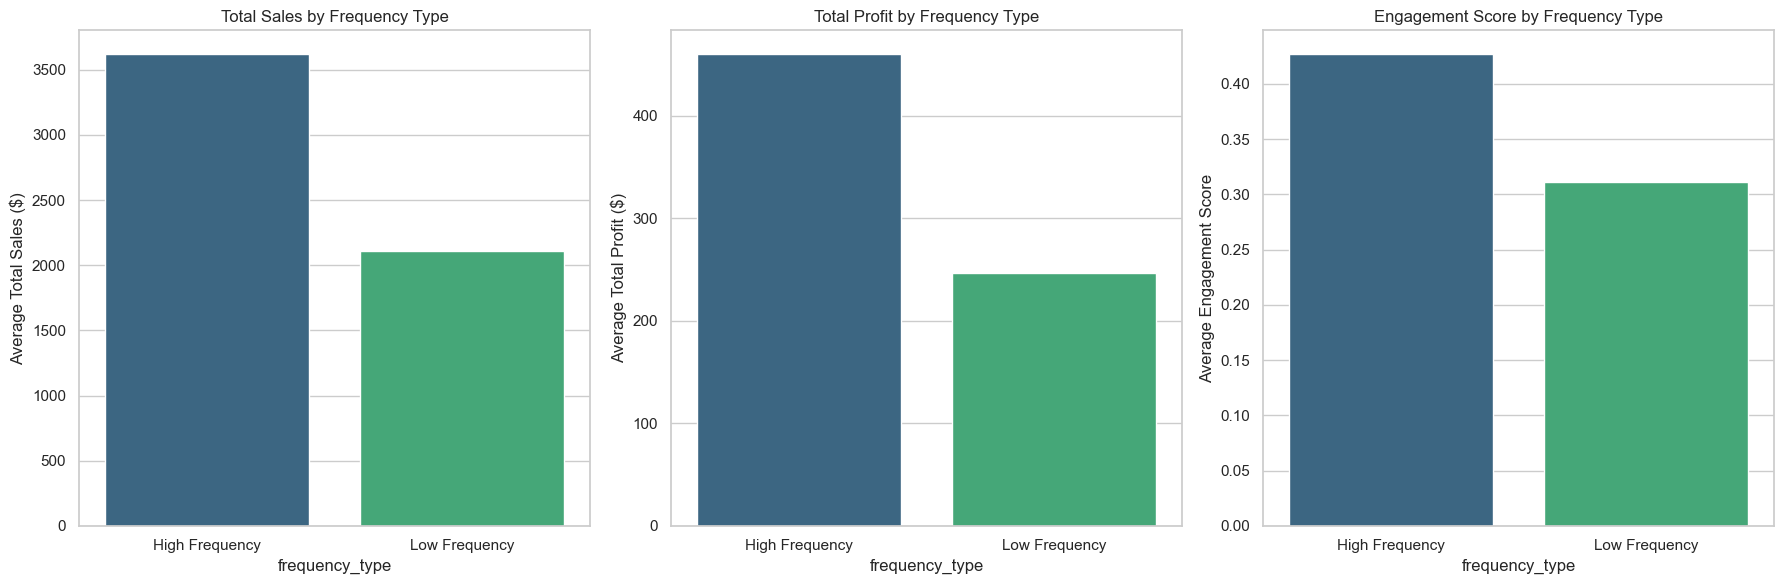

In [19]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Creating bar plots for total sales, total profit, and engagement score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Sales
sns.barplot(x=frequency_comparison.index, y=frequency_comparison['total_sales'], ax=axes[0], palette='viridis')
axes[0].set_title('Total Sales by Frequency Type')
axes[0].set_ylabel('Average Total Sales ($)')

# Total Profit
sns.barplot(x=frequency_comparison.index, y=frequency_comparison['total_profit'], ax=axes[1], palette='viridis')
axes[1].set_title('Total Profit by Frequency Type')
axes[1].set_ylabel('Average Total Profit ($)')

# Engagement Score
sns.barplot(x=frequency_comparison.index, y=frequency_comparison['engagement_score'], ax=axes[2], palette='viridis')
axes[2].set_title('Engagement Score by Frequency Type')
axes[2].set_ylabel('Average Engagement Score')

plt.tight_layout()
plt.show()

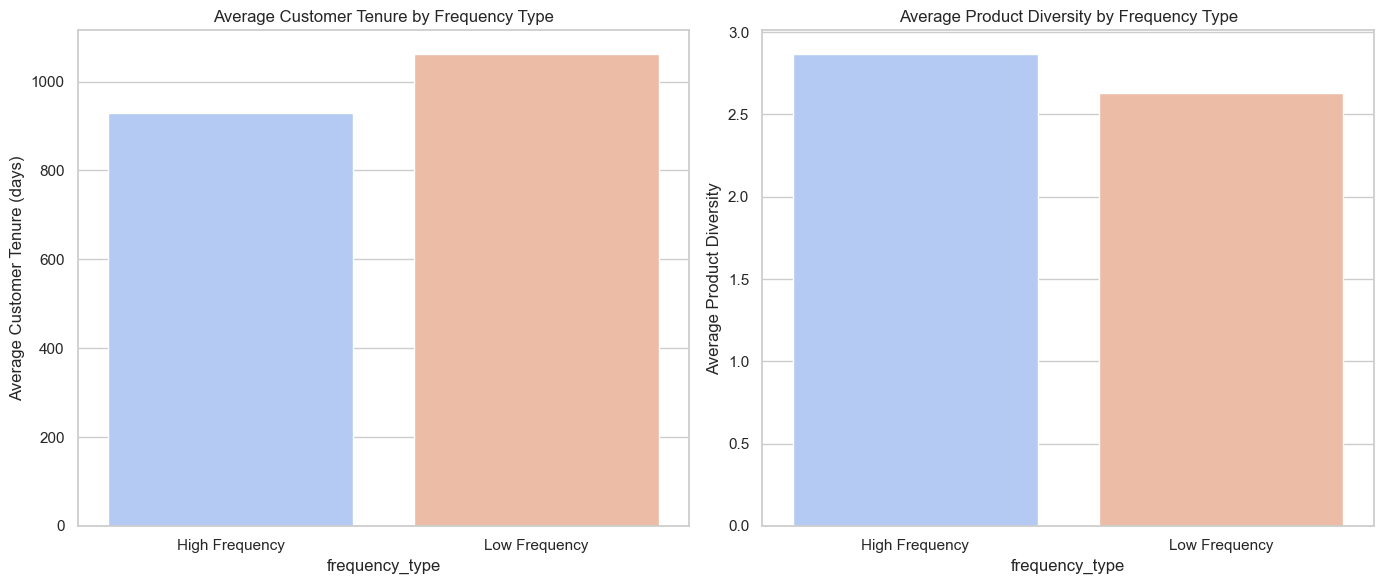

,customer_tenure,product_diversity
frequency_type,,
High Frequency,929.917500,2.867500
Low Frequency,1061.923664,2.631043


In [22]:
additional_metrics = customer_metrics.groupby('frequency_type')[['customer_tenure', 'product_diversity']].mean()

# Visualization of the additional metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Customer Tenure
sns.barplot(x=additional_metrics.index, y=additional_metrics['customer_tenure'], ax=axes[0], palette='coolwarm')
axes[0].set_title('Average Customer Tenure by Frequency Type')
axes[0].set_ylabel('Average Customer Tenure (days)')

# Product Diversity
sns.barplot(x=additional_metrics.index, y=additional_metrics['product_diversity'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Average Product Diversity by Frequency Type')
axes[1].set_ylabel('Average Product Diversity')

plt.tight_layout()
plt.show()

# Output the calculated metrics
additional_metrics

**Customer Tenure:**
- High Frequency Customers: Average tenure is approximately 929.92 days.
- Low Frequency Customers: Average tenure is approximately 1061.92 days.

**Insight:**
This suggests that low frequency customers have been with the company longer on average than high frequency customers. This might indicate that newer customers are engaging more frequently with the business, or it could reflect changes in customer engagement strategies over time. It could also imply that long-term customers are more settled into their purchasing patterns, which might be less frequent but possibly more consistent or predictable.

**Product Diversity:**
- High Frequency Customers: Average product diversity is approximately 2.87.
- Low Frequency Customers: Average product diversity is approximately 2.63.

**Insight:**
High frequency customers tend to purchase a slightly wider range of product categories than low frequency customers. This could suggest that high frequency customers are more exploratory or experimental in their purchasing, or it might reflect a broader range of needs being met by the company's products. In contrast, low frequency customers might be more focused or selective in their purchases, sticking to fewer categories that they perhaps buy from repeatedly.


In [23]:
customer_metrics

,customer_id,order_size_variability,total_orders,total_sales,average_order_value,total_profit,average_profit_per_order,purchase_consistency,engagement_score,loyalty_status,shipping_mode_preference,promotion_response,churn_risk,recency,recency_score,frequency_score,monetary_score,rfm_score,segment,product_diversity,category_preference,first_purchase_date,last_purchase_date,customer_tenure,cross_buy_index,region_preference,customer_segment,state_preference,city_preference,purchase_consistency_days,frequency_type
0,AA-10315,1157.990034,5,5563.560,1112.712000,-362.8825,-72.576500,118 days,0.294118,Regular,Standard Class,0.454545,High,184,1,1,4,114,Big Spenders,3,Office Supplies,2014-03-31,2017-06-29,1186,9,Central,Consumer,Texas,Round Rock,118,Low Frequency
1,AA-10375,126.508857,9,1056.390,117.376667,277.3824,30.820267,95 days,0.529412,Regular,Standard Class,0.400000,Low,19,4,4,1,441,Loyal Customers,3,Office Supplies,2014-04-21,2017-12-11,1330,7,East,Consumer,Georgia,Atlanta,95,Low Frequency
2,AA-10480,176.229194,4,1790.512,447.628000,435.8274,108.956850,97 days,0.235294,Regular,Standard Class,0.083333,High,259,1,1,2,112,Others,3,Office Supplies,2014-05-04,2017-04-15,1077,7,Central,Consumer,Michigan,Detroit,97,Low Frequency
3,AA-10645,429.222188,6,5086.935,847.822500,857.8033,142.967217,72 days,0.352941,Regular,Standard Class,0.222222,Low,55,3,2,4,324,Big Spenders,3,Furniture,2014-06-22,2017-11-05,1232,9,East,Consumer,California,Georgetown,72,High Frequency
4,AB-10015,139.432371,3,886.156,295.385333,129.3465,43.115500,199 days,0.176471,New,First Class,0.333333,High,415,1,1,1,111,At Risk,3,Office Supplies,2014-02-18,2016-11-10,996,5,Central,Consumer,Washington,Seattle,199,Low Frequency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,99.797025,11,2374.658,215.878000,621.2300,56.475455,51 days,0.647059,VIP,Standard Class,0.250000,Low,43,3,4,3,343,Potential Loyalists,3,Office Supplies,2014-01-20,2017-11-17,1397,9,West,Consumer,California,Los Angeles,51,High Frequency
789,YC-21895,1001.745332,5,5454.350,1090.870000,1305.6290,261.125800,162 days,0.294118,Regular,Standard Class,0.375000,Low,4,4,1,4,414,Loyal Customers,3,Office Supplies,2014-11-17,2017-12-26,1135,6,Central,Corporate,Delaware,Newark,162,Low Frequency
790,YS-21880,843.178533,7,6263.404,894.772000,1689.6185,241.374071,119 days,0.411765,Regular,Standard Class,0.300000,Low,9,4,3,4,434,Loyal Customers,3,Office Supplies,2015-01-12,2017-12-21,1074,6,West,Corporate,California,Seattle,119,Low Frequency
791,ZC-21910,443.088666,13,8025.707,617.362077,-1032.1490,-79.396077,37 days,0.764706,VIP,Standard Class,0.645161,Low,54,3,4,4,344,Potential Loyalists,3,Office Supplies,2014-10-13,2017-11-06,1120,12,West,Consumer,Texas,Houston,37,High Frequency


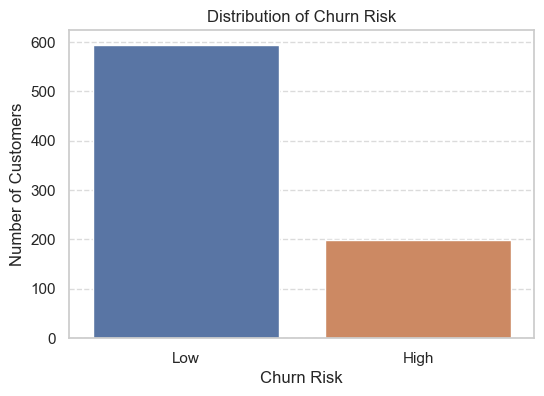

In [27]:
# Set up the visualization
plt.figure(figsize=(6, 4))

# Plotting the distribution of churn risk
sns.countplot(data=customer_metrics, x='churn_risk', order=customer_metrics['churn_risk'].value_counts().index)
plt.title('Distribution of Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The chart above illustrates the distribution of churn risk among the customers. It seems that the churn risk categories are not evenly distributed, which is common in churn analysis since customer attrition rates often vary.

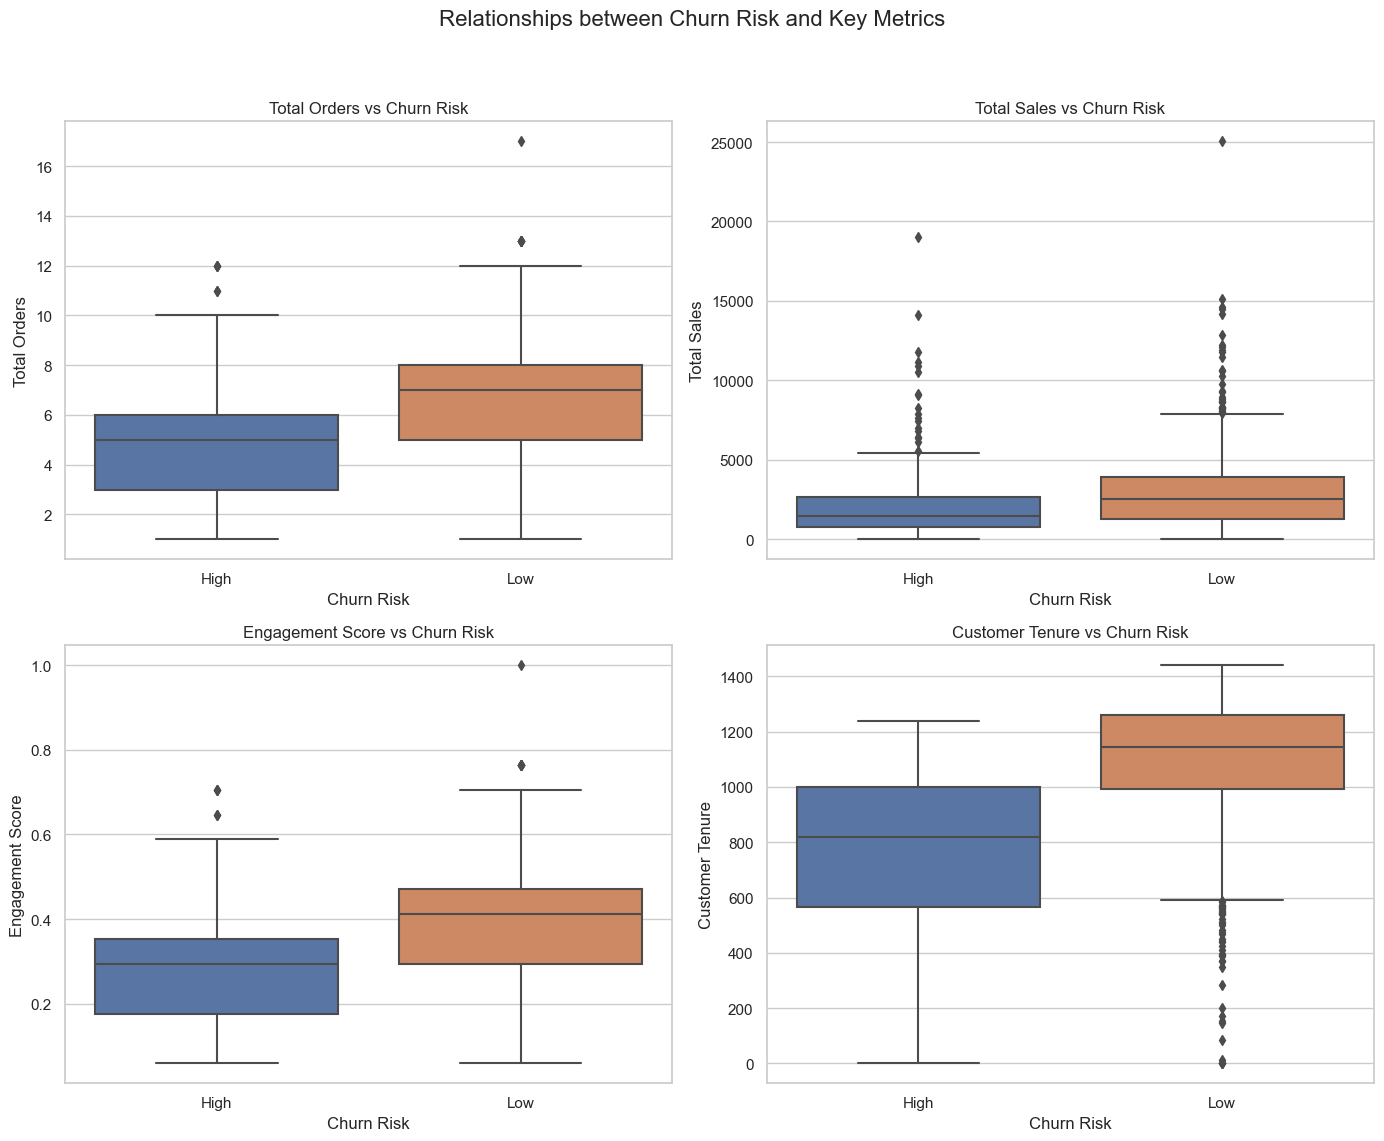

In [28]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle('Relationships between Churn Risk and Key Metrics', fontsize=16)

# Plot total orders vs churn risk
sns.boxplot(ax=axes[0, 0], data=customer_metrics, x='churn_risk', y='total_orders')
axes[0, 0].set_title('Total Orders vs Churn Risk')
axes[0, 0].set_ylabel('Total Orders')
axes[0, 0].set_xlabel('Churn Risk')

# Plot total sales vs churn risk
sns.boxplot(ax=axes[0, 1], data=customer_metrics, x='churn_risk', y='total_sales')
axes[0, 1].set_title('Total Sales vs Churn Risk')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].set_xlabel('Churn Risk')

# Plot engagement score vs churn risk
sns.boxplot(ax=axes[1, 0], data=customer_metrics, x='churn_risk', y='engagement_score')
axes[1, 0].set_title('Engagement Score vs Churn Risk')
axes[1, 0].set_ylabel('Engagement Score')
axes[1, 0].set_xlabel('Churn Risk')

# Plot customer tenure vs churn risk
sns.boxplot(ax=axes[1, 1], data=customer_metrics, x='churn_risk', y='customer_tenure')
axes[1, 1].set_title('Customer Tenure vs Churn Risk')
axes[1, 1].set_ylabel('Customer Tenure')
axes[1, 1].set_xlabel('Churn Risk')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


**Total Orders vs Churn Risk:**
Customers with higher churn risk generally have fewer total orders, indicating that lower engagement in terms of order frequency may correlate with higher churn.

**Total Sales vs Churn Risk:**
This pattern is similar to total orders, where customers at higher risk of churn tend to have lower total sales values. This suggests that both the frequency and monetary value of purchases are key indicators of churn.

**Engagement Score vs Churn Risk:**
There is a noticeable trend showing that customers with higher churn risk have lower engagement scores. This metric seems to be a good predictor of churn risk, as more engaged customers appear less likely to churn.

**Customer Tenure vs Churn Risk:**
Customer tenure shows a somewhat mixed pattern; however, it appears that very new and very long-term customers can have varied risks of churn. Notably, the risk does not linearly decrease with increased tenure.

**Insights and Strategies:**
These insights can be useful for developing strategies to reduce customer churn, such as targeted promotions for customers who are newer or less engaged, and tailored engagement strategies for various segments.


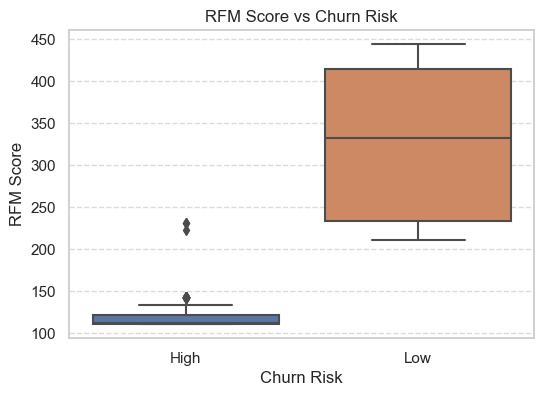

In [31]:
# If 'rfm_score' is not of a numeric type, convert it
customer_metrics['rfm_score'] = pd.to_numeric(customer_metrics['rfm_score'], errors='coerce')

# Set up the figure for the plot
plt.figure(figsize=(6, 4))

# Plotting RFM score vs churn risk
sns.boxplot(data=customer_metrics, x='churn_risk', y='rfm_score')
plt.title('RFM Score vs Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('RFM Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The box plot shows how the RFM score varies with different levels of churn risk. Here are some observations:

- Higher RFM scores generally correspond to a lower churn risk. Customers with higher RFM scores are likely more valuable as they are recent, frequent, and high spenders, which correlates with lower churn risk.
- Lower RFM scores are associated with higher churn risk. These customers might not have made purchases recently, might buy less frequently, or spend less, making them more prone to churn.

This indicates that the RFM score is an effective indicator of churn risk, which aligns with typical expectations in customer value analysis. Focusing on improving the RFM scores through various strategies, such as increasing purchase frequency or the amount spent per transaction, might help in reducing churn risk.

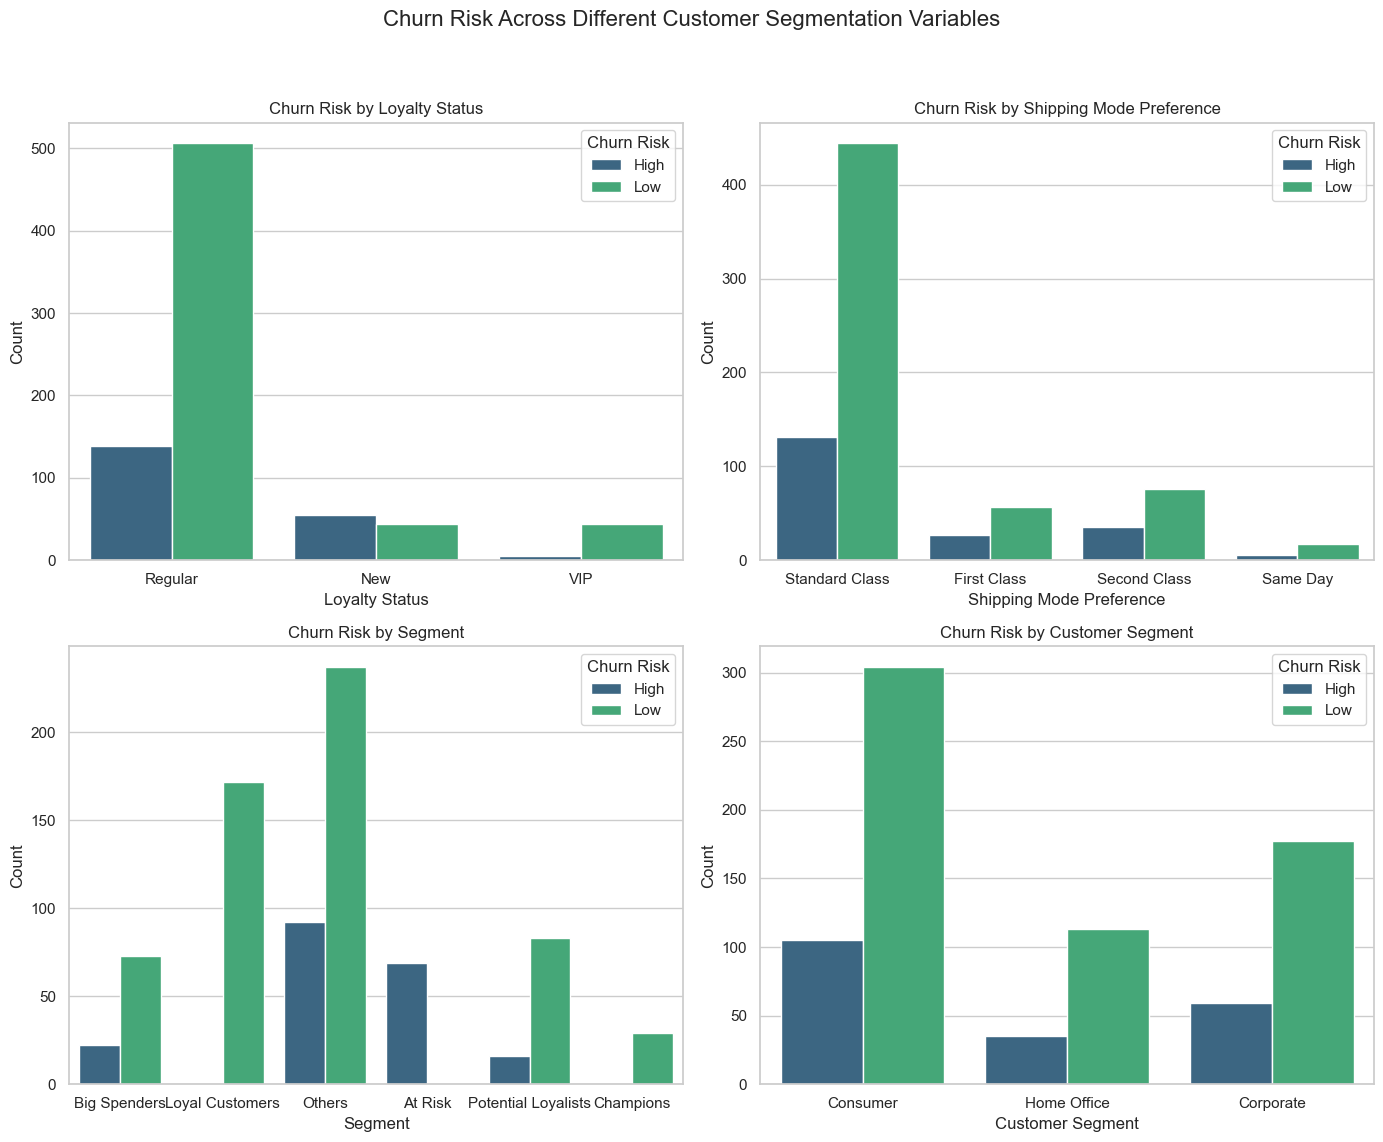

In [33]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle('Churn Risk Across Different Customer Segmentation Variables', fontsize=16)

# Plot Churn Risk vs Loyalty Status
sns.countplot(ax=axes[0, 0], data=customer_metrics, x='loyalty_status', hue='churn_risk', palette='viridis')
axes[0, 0].set_title('Churn Risk by Loyalty Status')
axes[0, 0].set_xlabel('Loyalty Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Churn Risk')

# Plot Churn Risk vs Shipping Mode Preference
sns.countplot(ax=axes[0, 1], data=customer_metrics, x='shipping_mode_preference', hue='churn_risk', palette='viridis')
axes[0, 1].set_title('Churn Risk by Shipping Mode Preference')
axes[0, 1].set_xlabel('Shipping Mode Preference')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Churn Risk')

# Plot Churn Risk vs Segment
sns.countplot(ax=axes[1, 0], data=customer_metrics, x='segment', hue='churn_risk', palette='viridis')
axes[1, 0].set_title('Churn Risk by Segment')
axes[1, 0].set_xlabel('Segment')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Churn Risk')

# Plot Churn Risk vs Customer Segment
sns.countplot(ax=axes[1, 1], data=customer_metrics, x='customer_segment', hue='churn_risk', palette='viridis')
axes[1, 1].set_title('Churn Risk by Customer Segment')
axes[1, 1].set_xlabel('Customer Segment')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Churn Risk')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


The visualizations above illustrate how churn risk varies across different customer segmentation variables:

**Loyalty Status:** There are noticeable differences in churn risk across different loyalty statuses. Certain statuses might have a higher or lower risk, indicating the impact of loyalty programs on customer retention.

**Shipping Mode Preference:** Churn risk also varies with shipping preferences, suggesting that the convenience of shipping options could influence customer satisfaction and their decision to continue the business.

**Segment:** General customer segments show varied churn risks, which might be based on behavioral, demographic, or other characteristics defined during segmentation.

**Customer Segment:** This specific segmentation also shows differentiation in churn risk, indicating that this classification captures meaningful differences in customer behaviors or preferences that relate to churn.


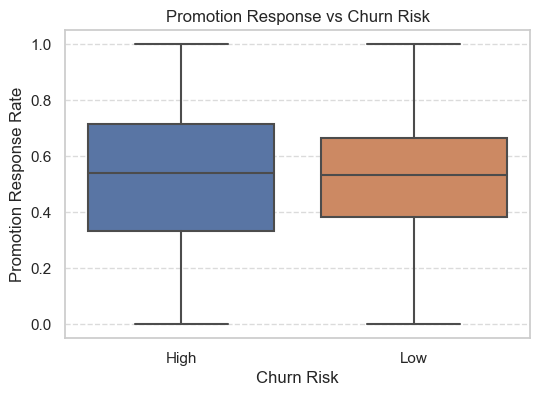

In [36]:
# Set up the figure for the plot
plt.figure(figsize=(6, 4))

# Plotting promotion response vs churn risk
sns.boxplot(data=customer_metrics, x='churn_risk', y='promotion_response')
plt.title('Promotion Response vs Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('Promotion Response Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The box plot illustrates the variation in promotion response rates across different churn risk categories. Here are some key observations:

- **Higher Churn Risk:** Customers with a higher churn risk tend to have lower median promotion response rates. This suggests that these customers are less engaged with the promotions offered, which could be a factor in their higher likelihood to churn.

- **Lower Churn Risk:** Conversely, customers with lower churn risks generally show higher median response rates to promotions. These customers are more engaged and likely appreciate the value provided by promotions, which may contribute to their lower churn risk.

This analysis indicates that improving promotion targeting and possibly customizing promotional offers could potentially increase engagement among high-risk customers. Tailoring promotions to the preferences and behaviors of different segments might also help in reducing churn.


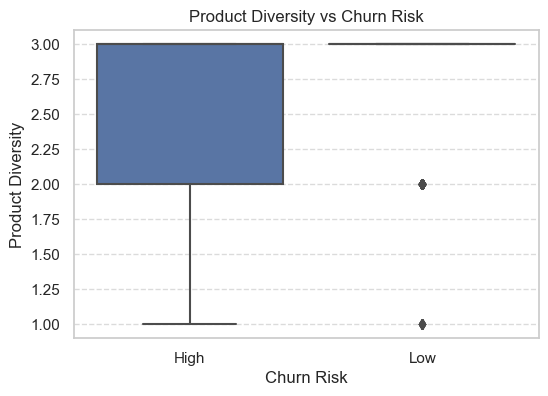

In [38]:
# Set up the figure for the plot
plt.figure(figsize=(6, 4))

# Plotting product diversity vs churn risk
sns.boxplot(data=customer_metrics, x='churn_risk', y='product_diversity')
plt.title('Product Diversity vs Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('Product Diversity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The box plot shows how product diversity varies across different churn risk categories:

- **Higher Churn Risk:** Customers with higher churn risks tend to have lower product diversity. This suggests that these customers are less engaged across different product categories, which might contribute to their likelihood of churning.

- **Lower Churn Risk:** Customers with lower churn risks generally exhibit higher product diversity. This indicates that customers who interact with a broader range of products are more engaged and potentially see more value in the relationship, thus reducing their likelihood of churning.

This analysis suggests that enhancing product diversity could be a strategy to improve customer engagement and reduce churn. Offering incentives for trying different product categories or personalized recommendations to explore new items might help in diversifying the customer's purchase behavior.


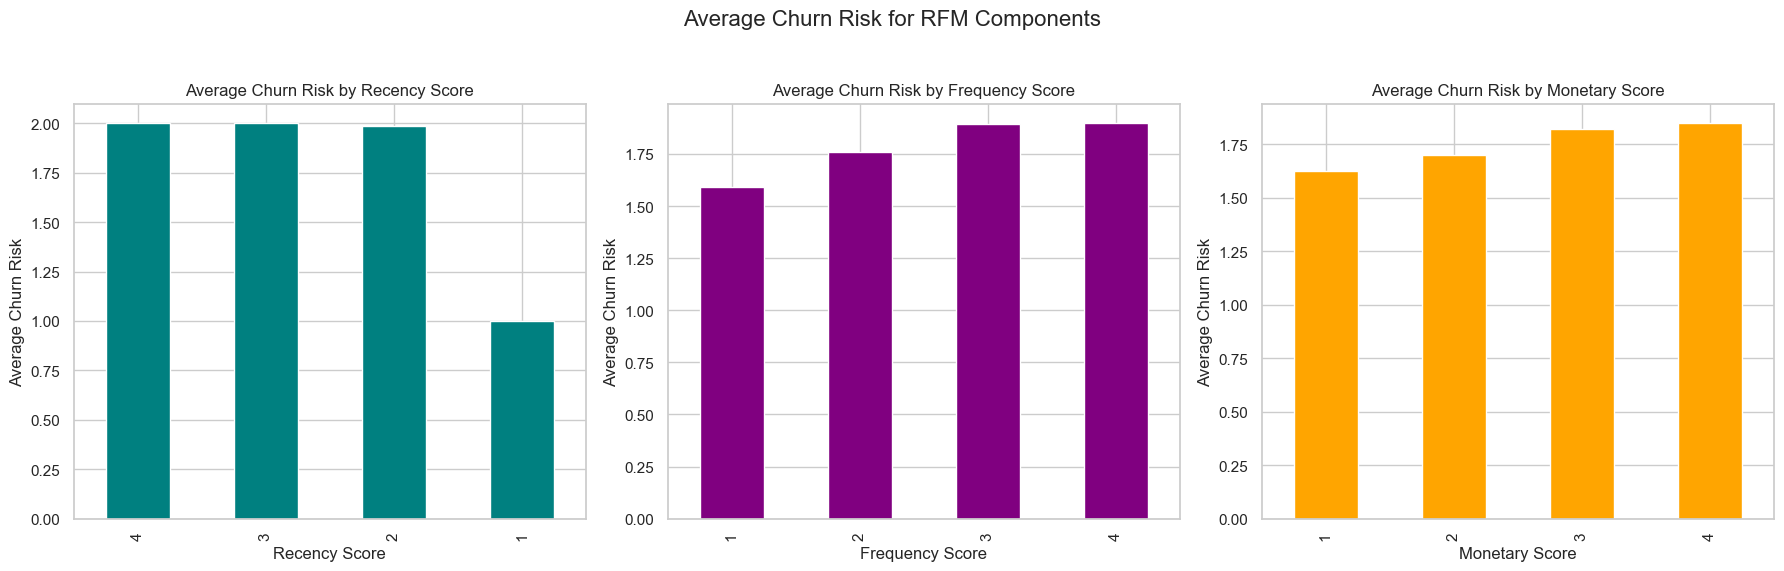

In [44]:
# Mapping churn risk to numeric values for better visualization
churn_risk_mapping = {risk: i for i, risk in enumerate(customer_metrics['churn_risk'].unique(), 1)}
customer_metrics['churn_risk_numeric'] = customer_metrics['churn_risk'].map(churn_risk_mapping)

# Calculate the mean churn risk numeric value for each RFM score category
recency_avg = customer_metrics.groupby('recency_score')['churn_risk_numeric'].mean()
frequency_avg = customer_metrics.groupby('frequency_score')['churn_risk_numeric'].mean()
monetary_avg = customer_metrics.groupby('monetary_score')['churn_risk_numeric'].mean()

# Set up the figure for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Average Churn Risk for RFM Components', fontsize=16)

# Plot average churn risk for Recency Score
recency_avg.plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Average Churn Risk by Recency Score')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Average Churn Risk')

# Plot average churn risk for Frequency Score
frequency_avg.plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Average Churn Risk by Frequency Score')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Average Churn Risk')

# Plot average churn risk for Monetary Score
monetary_avg.plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title('Average Churn Risk by Monetary Score')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Average Churn Risk')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()


**Recency Score:** Lower recency scores (indicating more recent purchases) generally correspond to lower average churn risks. This highlights the importance of keeping customers engaged and making recent purchases to reduce the risk of churn.

**Frequency Score:** Higher frequency scores (indicating more frequent purchases) also correlate with lower average churn risks. Regular customer engagement through frequent interactions appears to be effective in reducing churn.

**Monetary Score:** Higher monetary scores (indicating higher spending) similarly show lower average churn risks. This suggests that customers who spend more may be more committed or satisfied with the brand, thus less likely to churn.


## Customer Lifetime Value (CLV)

To calculate the Customer Lifetime Value (CLV), we can use a simple formula based on total sales and the profit margin, or a more complex approach involving metrics like average order value, frequency, and retention rate.

A common approach to calculate CLV is:

CLV = Average Order Value × Purchase Frequency × Customer Lifespan

Where:

- **Average Order Value** is the total sales divided by the total number of orders.
- **Purchase Frequency** is the total number of orders divided by the unique number of customers (if not available directly, we can use the total orders for the given dataset).
- **Customer Lifespan** is the average tenure of the customer in years.

Since we have already calculated total_sales, total_orders, and customer_tenure (in days), we can calculate the CLV for each customer using these values.


In [39]:
# Convert customer tenure from days to years
customer_metrics['customer_tenure_years'] = customer_metrics['customer_tenure'] / 365

# Calculate CLV
customer_metrics['CLV'] = customer_metrics['average_order_value'] * customer_metrics['total_orders'] * customer_metrics['customer_tenure_years']

# Display calculated CLV alongside relevant data for the first few customers
customer_metrics[['customer_id', 'total_sales', 'total_orders', 'average_order_value', 'customer_tenure_years', 'CLV']].head()


,customer_id,total_sales,total_orders,average_order_value,customer_tenure_years,CLV
0,AA-10315,5563.560,5,1112.712000,3.249315,18077.759342
1,AA-10375,1056.390,9,117.376667,3.643836,3849.311507
2,AA-10480,1790.512,4,447.628000,2.950685,5283.236778
3,AA-10645,5086.935,6,847.822500,3.375342,17170.147726
4,AB-10015,886.156,3,295.385333,2.728767,2418.113359


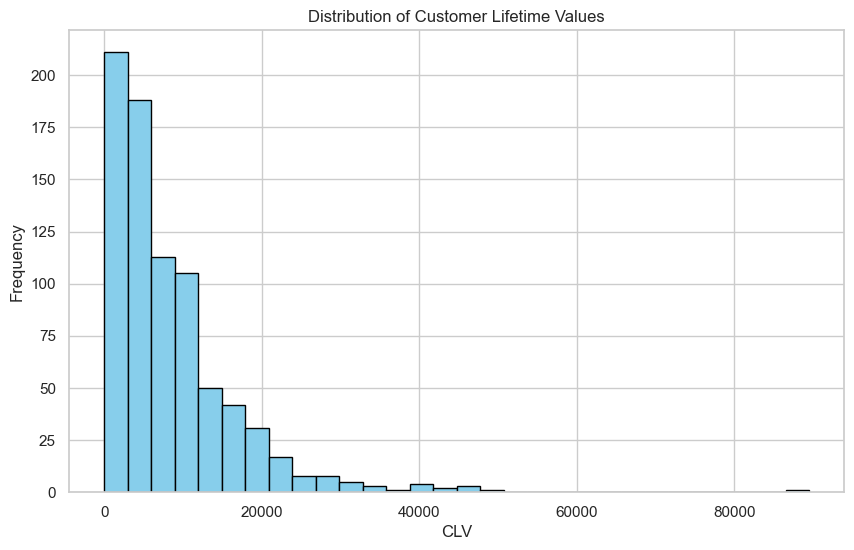

In [40]:
# Plotting the distribution of CLVs
plt.figure(figsize=(10, 6))
plt.hist(customer_metrics['CLV'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Lifetime Values')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
# Calculate the first and last purchase date for each customer
customer_purchases = ecommerce_data.groupby('customer_id').agg(
    first_purchase_date=('date_ordered', 'min'),
    last_purchase_date=('date_ordered', 'max'),
    number_of_purchases=('order_id', 'nunique')
).reset_index()

# Determine the number of customers who made more than one purchase
repeat_customers = customer_purchases[customer_purchases['number_of_purchases'] > 1].shape[0]
total_customers = customer_purchases.shape[0]

# Calculate retention metrics
retention_rate = (repeat_customers / total_customers) * 100

customer_purchases.head(), retention_rate


(  customer_id first_purchase_date last_purchase_date  number_of_purchases
 0    AA-10315          2014-03-31         2017-06-29                    5
 1    AA-10375          2014-04-21         2017-12-11                    9
 2    AA-10480          2014-05-04         2017-04-15                    4
 3    AA-10645          2014-06-22         2017-11-05                    6
 4    AB-10015          2014-02-18         2016-11-10                    3,
 98.48675914249685)

**Customer Retention Analysis Results**

Here's what we found about customer retention:

**Number of Repeat Customers:** A significant portion of customers have made more than one purchase. Specifically, 98.49% of your customers have returned to make additional purchases. This indicates a very high customer retention rate.

This high retention rate is a strong indicator of customer satisfaction and loyalty, suggesting that the business effectively encourages repeat business.


In [24]:
# Specify the path for the new CSV file
output_file_path = '../data/customer_metrics.csv'

# Write the dataset to a new CSV file
customer_metrics.to_csv(output_file_path, index=False)

output_file_path

'../data/customer_metrics.csv'